#Task 1: Upload the data and load into the Notebook

In [ ]:
try:
    import gdown
except ImportError:
    !pip install gdown
    import gdown
import gdown

# File ID from your Google Drive link
file_id = '1820cTzLBkyQLoJ9YngYu7KAw2gtPZF3O'
# URL to download the file
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
fileName = 'depression_data.csv'  # Specify the output file name
gdown.download(url, fileName, quiet=False)

#load the dataset and convert it into dataframe using pandas
import pandas as pd #This line imports the pandas library, which is used for data manipulation and analysis.
file_path = 'depression_data.csv' #the data is comma-seperated text (Comma Seperate Values) format
data = pd.read_csv(file_path)

Downloading...
From: https://drive.google.com/uc?id=1820cTzLBkyQLoJ9YngYu7KAw2gtPZF3O
To: /content/depression_data.csv
100%|██████████| 5.36M/5.36M [00:00<00:00, 21.8MB/s]


#Analysis 1: How is the distribution of the dataset in terms of individuals with and without depression?

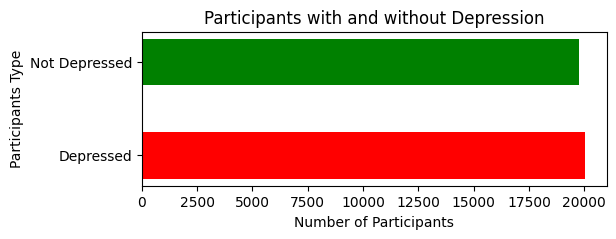

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Initialize counts
num_depressed = 0
num_not_depressed = 0

# Counting the number of patients with depression (1) and without depression (0)
for value in data['depressed']:
    if value == 1:
        num_depressed += 1
    elif value == 0:
        num_not_depressed += 1

# Plotting the results with horizontal bars
labels = ['Depressed', 'Not Depressed']
counts = [num_depressed, num_not_depressed]

plt.figure(figsize=(6, 2))
plt.barh(labels, counts, color=['red', 'green'], height = 0.5)  # Horizontal bar plot
plt.xlabel('Number of Participants')
plt.ylabel('Participants Type')
plt.title('Participants with and without Depression')
plt.show()

#Analysis: What is the distribution of participants age groups?

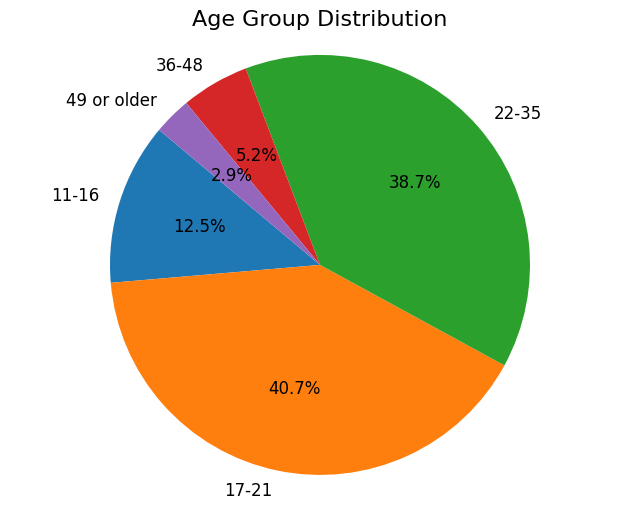

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Define the age groups and their corresponding labels
age_groups = {
    1: '10 or younger',
    2: '11-16',
    3: '17-21',
    4: '22-35',
    5: '36-48',
    6: '49 or older'
}

# Count the occurrences of each age group
age_group_counts = data['age_group'].value_counts().sort_index()

# Map the age group numbers to their corresponding labels
age_group_labels = [age_groups[i] for i in age_group_counts.index]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    age_group_counts,
    labels=age_group_labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}  # Increase font size for labels and percentages
)
plt.title('Age Group Distribution', fontsize=16)  # Larger title font
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


#Analysis: In which age group is depression most prevalent?

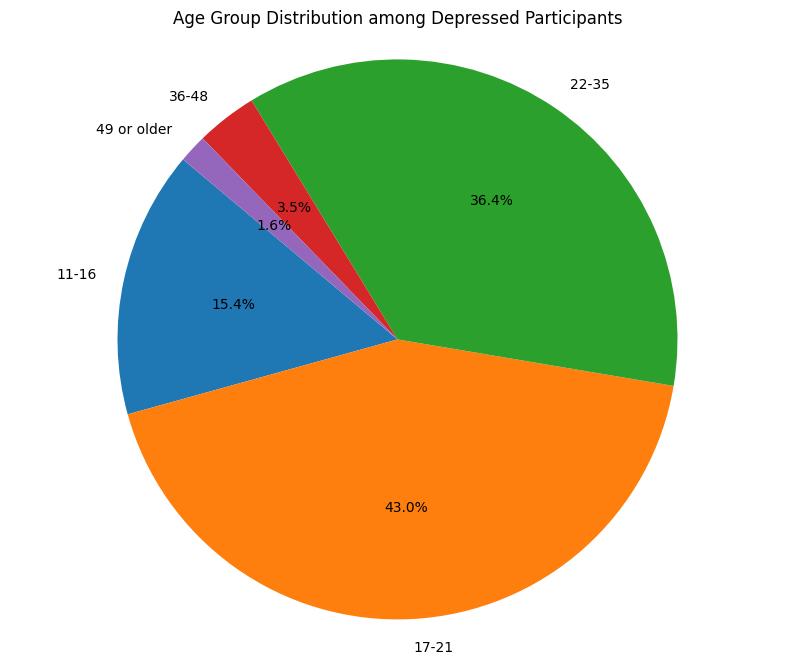

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Filter the dataset for participants with depressed = 1
depressed_data = data[data['depressed'] == 1]

# Define the age groups and their corresponding labels
age_groups = {
    1: '10 or younger',
    2: '11-16',
    3: '17-21',
    4: '22-35',
    5: '36-48',
    6: '49 or older'
}

# Count the occurrences of each age group in the depressed dataset
age_group_counts = depressed_data['age_group'].value_counts().sort_index()

# Map the age group numbers to their corresponding labels
age_group_labels = [age_groups[i] for i in age_group_counts.index]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(age_group_counts, labels=age_group_labels, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution among Depressed Participants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


#Analysis: How does maritial status relates to depression among participants?

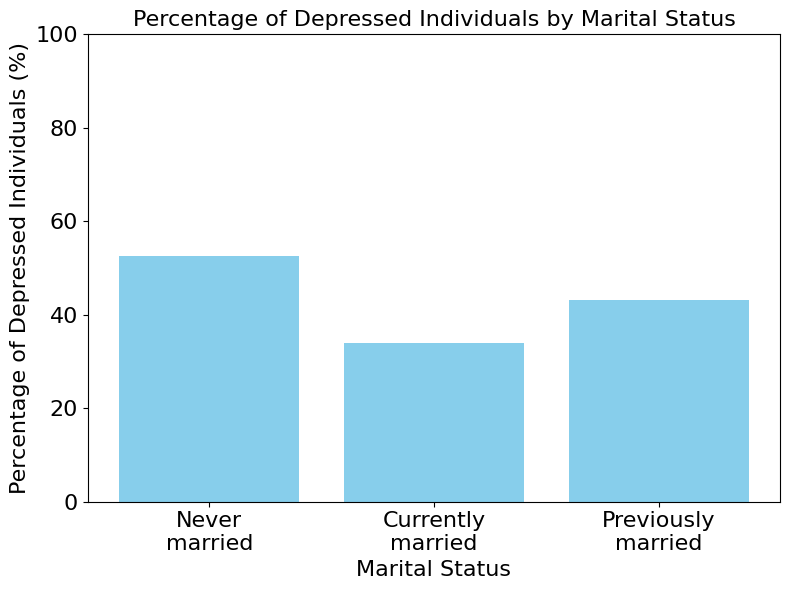

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Filter the dataset for participants where depressed = 1
depressed_data = data[data['depressed'] == 1]

# Define marital status categories and their corresponding labels (with line breaks)
marital_status_labels = {
    1: 'Never\nmarried',
    2: 'Currently\nmarried',
    3: 'Previously\nmarried'
}

# Calculate the total number of participants in each marital status category
marital_status_total_counts = data['married'].value_counts().sort_index()

# Calculate the number of depressed participants in each marital status category
depressed_marital_status_counts = depressed_data['married'].value_counts().sort_index()

# Calculate the percentage of depressed individuals within each marital status category
marital_status_percentages = (depressed_marital_status_counts / marital_status_total_counts) * 100
marital_status_percentages = marital_status_percentages[marital_status_percentages.index.isin(marital_status_labels.keys())]

# Map the marital status numbers to their corresponding labels with line breaks
marital_status_labels_mapped = [marital_status_labels[i] for i in marital_status_percentages.index]

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Slightly narrower figure width
plt.bar(marital_status_labels_mapped, marital_status_percentages, color='skyblue', width=0.8)  # Wider bars

plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Percentage of Depressed Individuals (%)', fontsize=16)
plt.title('Percentage of Depressed Individuals by Marital Status', fontsize=16)
plt.xticks(fontsize=16, ha='center')  # No rotation, centered multi-line labels
plt.yticks(fontsize=16)
plt.ylim(0, 100)  # Ensure y-axis starts at 0 and ends at 100 for percentage
plt.tight_layout()
plt.show()


#Analysis: How does the gender relates to depression?

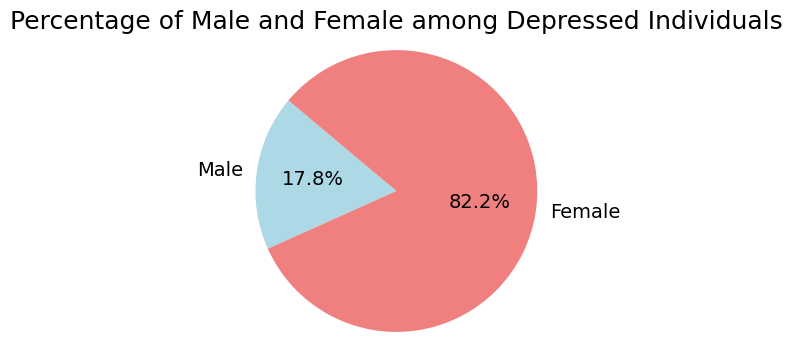

Percentage of Male among depressed individuals: 17.47%
Percentage of Female among depressed individuals: 80.50%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Filter the dataset for participants where depressed = 1
depressed_data = data[data['depressed'] == 1]

# Calculate the total number of depressed participants
total_depressed = len(depressed_data)

# Count the number of male (gender = 1) and female (gender = 2) participants among depressed individuals
male_count = len(depressed_data[depressed_data['gender'] == 1])
female_count = len(depressed_data[depressed_data['gender'] == 2])

# Calculate the percentage of male and female among depressed individuals
male_percentage = (male_count / total_depressed) * 100
female_percentage = (female_count / total_depressed) * 100

# Plotting the pie chart
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 14})  # Increase label font size here
plt.title('Percentage of Male and Female among Depressed Individuals', fontsize=18)  # Bigger title font
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print(f"Percentage of Male among depressed individuals: {male_percentage:.2f}%")
print(f"Percentage of Female among depressed individuals: {female_percentage:.2f}%")


#Analysis 2: what are the top 10 physiological factors/symptoms/signs that those are common within depressed individuals?  

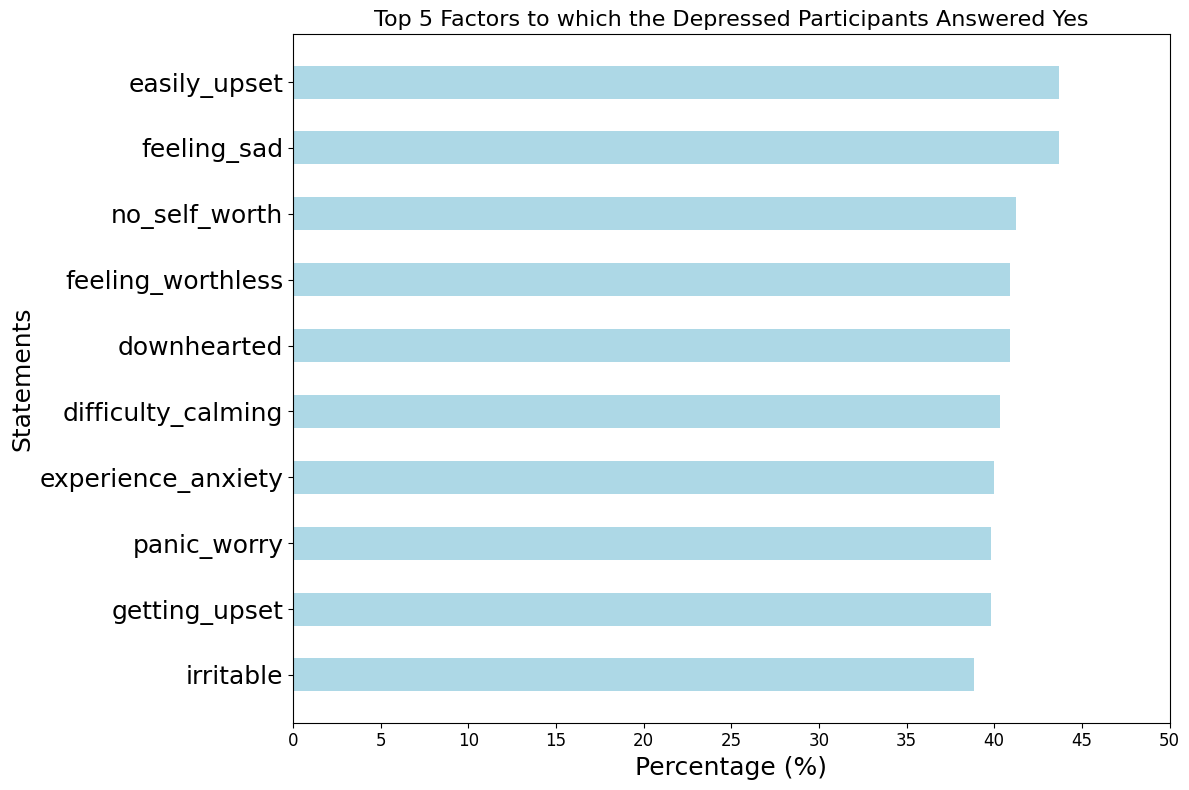

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Specify the range of columns where participants answered "yes"
yes_columns = data.columns[0:42]  # Adjust the range as needed

# Calculate percentage of depressed participants who answered "yes" for each column
percentages = []
for column in yes_columns:
    total_participants = len(data)
    depressed_yes_count = data[(data['depressed'] == 1) & (data[column] == 1)].shape[0]
    percentage_depressed_yes = (depressed_yes_count / total_participants) * 100
    percentages.append(percentage_depressed_yes)

# Sort the columns and percentages together
sorted_pairs = sorted(zip(percentages, yes_columns), reverse=True)
sorted_percentages, sorted_columns = zip(*sorted_pairs)

# Select top 5
top_10_percentages = sorted_percentages[:10]
top_10_columns = sorted_columns[:10]

# Plotting top 5 results
plt.figure(figsize=(12, 8))
plt.barh(top_10_columns, top_10_percentages, color='lightblue', height=0.5)
plt.xlabel('Percentage (%)', fontsize=18)
plt.ylabel('Statements', fontsize=18)
plt.title('Top 5 Factors to which the Depressed Participants Answered Yes', fontsize=16)
plt.xticks(range(0, 51, 5), fontsize=12)  # X-axis ticks with bigger font
plt.yticks(fontsize=18)  # Y-axis tick font size increased
plt.xlim(0, 50)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Analysis: what is the prevalence of behavioral factors among depressed individuals?

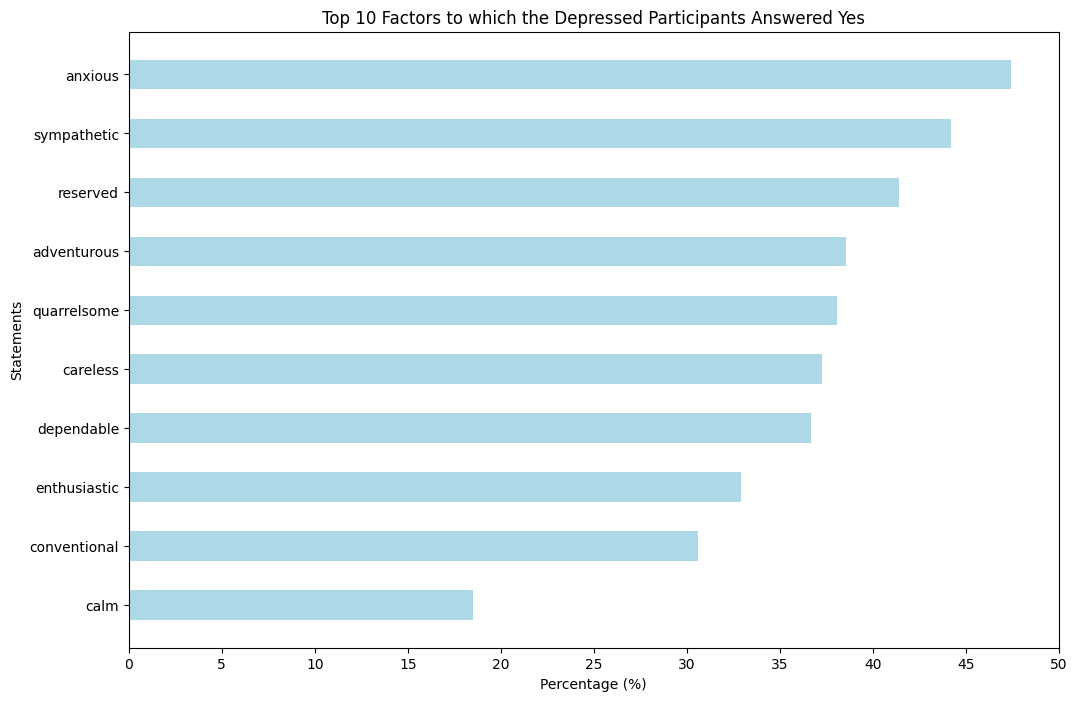

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Specify the range of columns where participants answered "yes"
yes_columns = data.columns[42:52]  # Adjust the range as needed

# Calculate percentage of depressed participants who answered "yes" for each column
percentages = []
for column in yes_columns:
    total_participants = len(data)
    depressed_yes_count = data[(data['depressed'] == 1) & (data[column] == 1)].shape[0]
    percentage_depressed_yes = (depressed_yes_count / total_participants) * 100
    percentages.append(percentage_depressed_yes)

# Sort the columns and percentages together
sorted_pairs = sorted(zip(percentages, yes_columns), reverse=True)
sorted_percentages, sorted_columns = zip(*sorted_pairs)

# Select top 10
top_10_percentages = sorted_percentages[:10]
top_10_columns = sorted_columns[:10]

# Plotting top 10 results
plt.figure(figsize=(12, 8))
plt.barh(top_10_columns, top_10_percentages, color='lightblue', height=0.5)
plt.xlabel('Percentage (%)')
plt.ylabel('Statements')
plt.title('Top 10 Factors to which the Depressed Participants Answered Yes')
plt.xticks(range(0, 51, 5))  # Set x-axis ticks at intervals of 5, limit to 50
plt.xlim(0, 50)  # Set x-axis limit to 50
plt.gca().invert_yaxis()  # Invert y-axis to show questions from top to bottom
plt.show()

#Analysis 3: Working with 2 or more factors

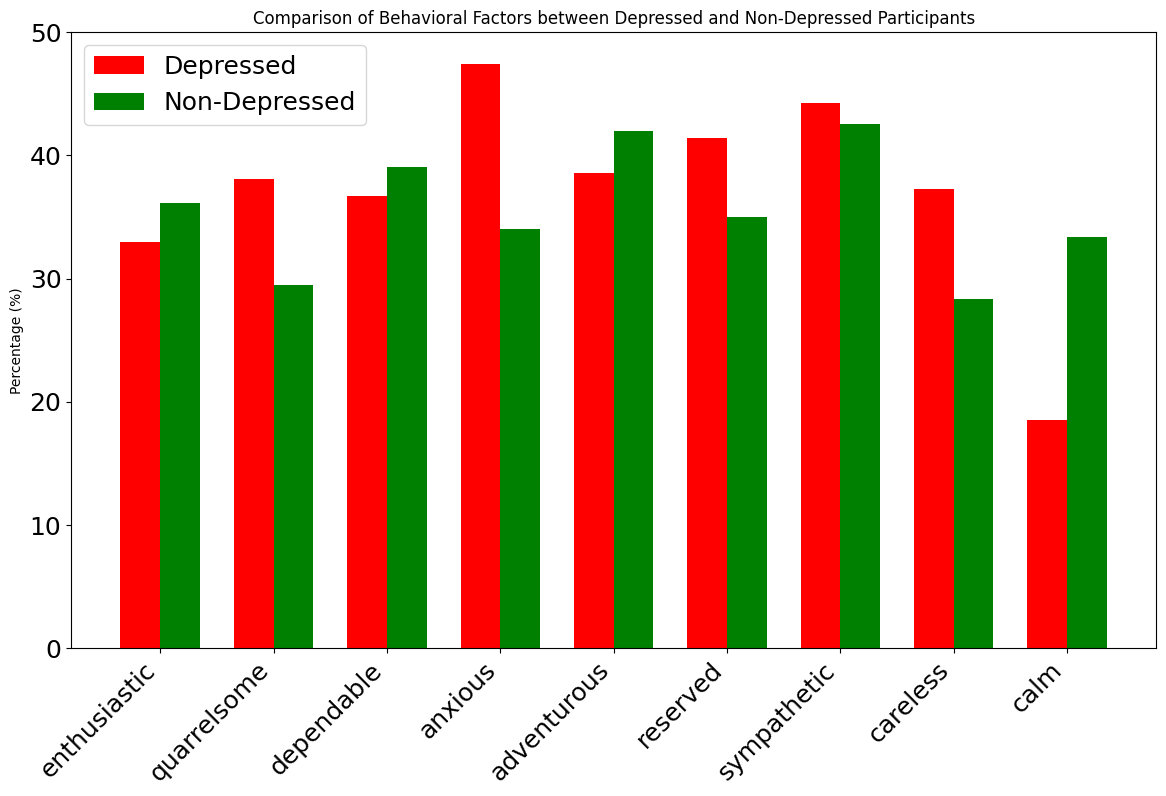

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# List of behavioral factors to include
factors = ['enthusiastic', 'quarrelsome', 'dependable', 'anxious', 'adventurous',
           'reserved', 'sympathetic', 'careless', 'calm']

# Calculate the percentage of participants for each factor in both depressed and non-depressed groups
percentages_depressed = []
percentages_non_depressed = []

total_participants = len(data)

for factor in factors:
    depressed_yes = data[(data['depressed'] == 1) & (data[factor] == 1)].shape[0]
    non_depressed_yes = data[(data['depressed'] == 0) & (data[factor] == 1)].shape[0]

    percentages_depressed.append((depressed_yes / total_participants) * 100)
    percentages_non_depressed.append((non_depressed_yes / total_participants) * 100)

# Plotting the results
x = range(len(factors))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bar1 = ax.bar(x, percentages_depressed, width, label='Depressed', color='red')
bar2 = ax.bar([p + width for p in x], percentages_non_depressed, width, label='Non-Depressed', color='green')

# Add labels, title, and legend
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Behavioral Factors between Depressed and Non-Depressed Participants')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(factors, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend(fontsize = 18)

# Set y-axis limit to 50 to match previous plot requirements
ax.set_ylim(0, 50)

plt.show()


#Analysis: How top 10 physiological factors correlate with 10 behavioral factors among depressed individuals?

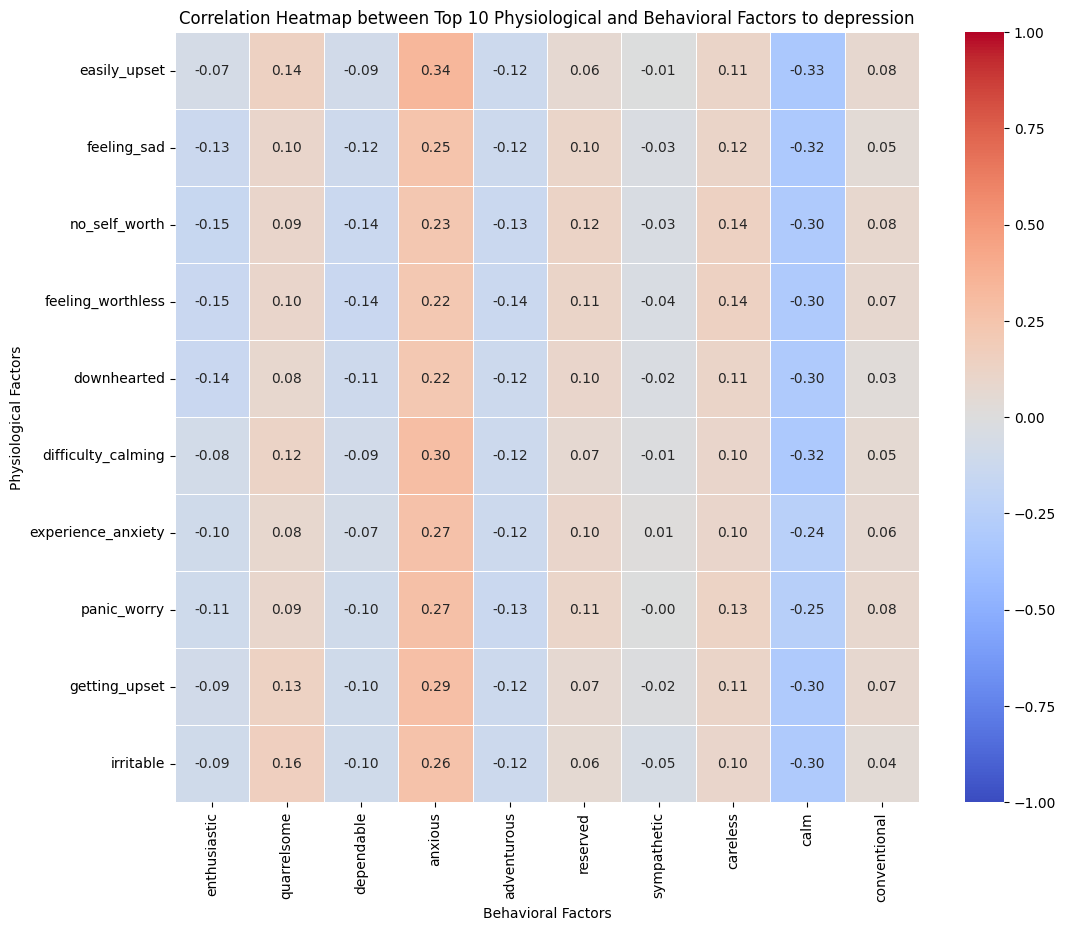

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)

# Specify the range of columns where participants answered "yes"
yes_columns = data.columns[0:42]  # Adjust the range as needed

# Calculate the percentage of depressed participants who answered "yes" for each column
percentages = []
for column in yes_columns:
    total_participants = len(data)
    depressed_yes_count = data[(data['depressed'] == 1) & (data[column] == 1)].shape[0]
    percentage_depressed_yes = (depressed_yes_count / total_participants) * 100
    percentages.append(percentage_depressed_yes)

# Sort the columns and percentages together
sorted_pairs = sorted(zip(percentages, yes_columns), reverse=True)
sorted_percentages, sorted_columns = zip(*sorted_pairs)

# Select top 10 columns
top_10_columns = list(sorted_columns[:10])

# Specify the other set of columns (data.columns[42:52])
other_columns = list(data.columns[42:52])

# Combine the top 10 columns and the other columns
combined_columns = top_10_columns + other_columns

# Calculate the correlation matrix for the combined columns
correlation_matrix = data[combined_columns].corr()

# Extract the correlation matrix between the top 10 columns and the other columns
correlation_submatrix = correlation_matrix.loc[top_10_columns, other_columns]

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_submatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, fmt='.2f')
plt.title('Correlation Heatmap between Top 10 Physiological and Behavioral Factors to depression')
plt.xlabel('Behavioral Factors')
plt.ylabel('Physiological Factors')
plt.show()